In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import loompy
import anndata

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
adata = sc.read_loom('mese_data_Yike.loom', X_name='spliced', obs_names='cellID', var_names='GeneName', dtype='float32')
adata.obs_names_make_unique() 
adata

scanpy==1.7.1 anndata==0.7.5 umap==0.5.1 numpy==1.20.3 scipy==1.6.1 pandas==1.2.3 scikit-learn==0.22 statsmodels==0.12.2 python-igraph==0.9.0 louvain==0.7.0


AnnData object with n_obs × n_vars = 4403 × 18072
    obs: 'DC', 'Gender', 'Mousename', 'Plate', 'SortType', 'Time [days]', 'Timepoint', 'TimepointHO', 'Treatment', 'Well', '_index', 'cellRoughSubtype', 'cellSubtype', 'cellSubtypeOld', 'cellType', 'coverage', 'doublet', 'embed_endo_1', 'embed_endo_2', 'fastq', 'mese_tSNE_1', 'mese_tSNE_2', 'number_of_genes_1plusreads'
    var: 'Chromosome', 'Gene stable ID', 'Strand', '_index', 'missing_info', 'n_geneIds'

In [2]:
sc.pp.log1p(adata)
cells_subtypes1=adata.obs['cellSubtype'].isin(['Alveolar fibroblast','Fibroblast precursor','Adventitial fibroblast'])
adata_subtypes1=adata[cells_subtypes1]
adata_subtypes1

View of AnnData object with n_obs × n_vars = 2301 × 18072
    obs: 'DC', 'Gender', 'Mousename', 'Plate', 'SortType', 'Time [days]', 'Timepoint', 'TimepointHO', 'Treatment', 'Well', '_index', 'cellRoughSubtype', 'cellSubtype', 'cellSubtypeOld', 'cellType', 'coverage', 'doublet', 'embed_endo_1', 'embed_endo_2', 'fastq', 'mese_tSNE_1', 'mese_tSNE_2', 'number_of_genes_1plusreads'
    var: 'Chromosome', 'Gene stable ID', 'Strand', '_index', 'missing_info', 'n_geneIds'
    uns: 'log1p'

ranking genes


/usr/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/usr/lib/python3.8/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'DC' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Gender' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Mousename' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'SortType' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Time [days]' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Timepoint' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'TimepointHO' as categorical
Trying 

    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:06)


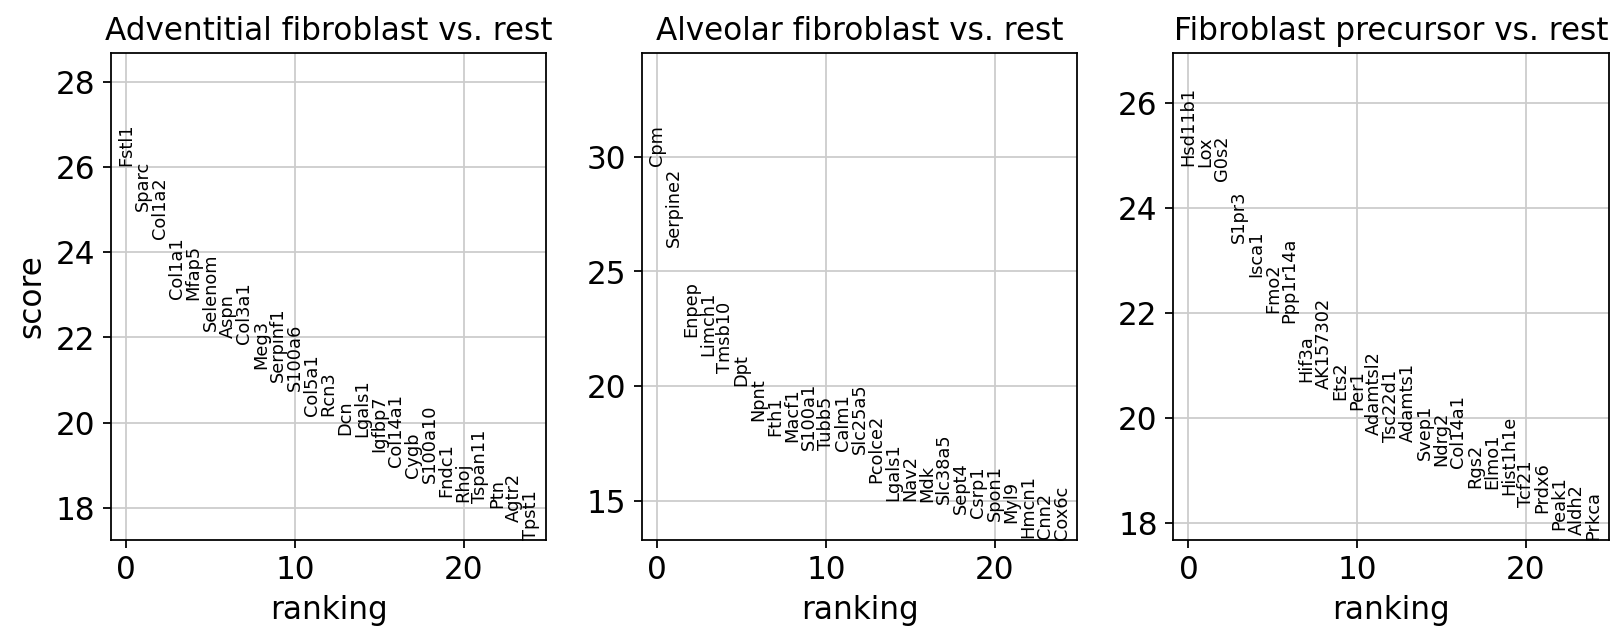

In [3]:
sc.tl.rank_genes_groups(adata_subtypes1, 'cellSubtype', method='wilcoxon')
sc.pl.rank_genes_groups(adata_subtypes1, n_genes=25, sharey=False)

In [4]:
A=adata_subtypes1.uns['rank_genes_groups']['names'][:100]
data = pd.DataFrame(A)
data.to_excel('excels/rank_genes_group_precursors&adventitial_and_alveolar_new.xlsx')

In [4]:
adata.obsm['X_tsne']=adata.obs[['mese_tSNE_1', 'mese_tSNE_2']]
csts = [
        'Fibroblast precursor',
        'Proliferating fibroblast',
        'Early alveolar fibroblast',
        'Alveolar fibroblast',
        'Early adventitial fibroblast',
        'Adventitial fibroblast',
        'Myofibroblast and smooth muscle precursor',
        'Early airway smooth muscle',
        'Airway smooth muscle',
        'Myofibroblast',
        'Proliferating myofibroblast',
        'Vascular smooth muscle',
        'Pericyte',
        'Proliferating pericyte',
    ]
colors = sns.color_palette('husl', n_colors=len(csts))
colormap = dict(zip(csts, colors))

cmap = {
        'E18.5': 'navy',
        'P1': 'gold',
        'P7': 'tomato',
        'P21': 'firebrick',
        }

In [6]:
#sc.pl.tsne(adata,color='Timepoint',palette=['navy','gold','tomato','firebrick'],save='figures/report/Timepoint.png')

/usr/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'DC' as categorical
... storing 'Gender' as categorical
... storing 'Mousename' as categorical
... storing 'SortType' as categorical
... storing 'Time [days]' as categorical
... storing 'Timepoint' as categorical
... storing 'TimepointHO' as categorical
... storing 'Treatment' as categorical
... storing 'Well' as categorical
... storing 'cellRoughSubtype' as categorical
... storing 'cellSubtype' as categorical
... storing 'cellSubtypeOld' as categorical
... storing 'cellType' as categorical
... storing 'Chromosome' as categorical
... storing 'missing_info' as categorical


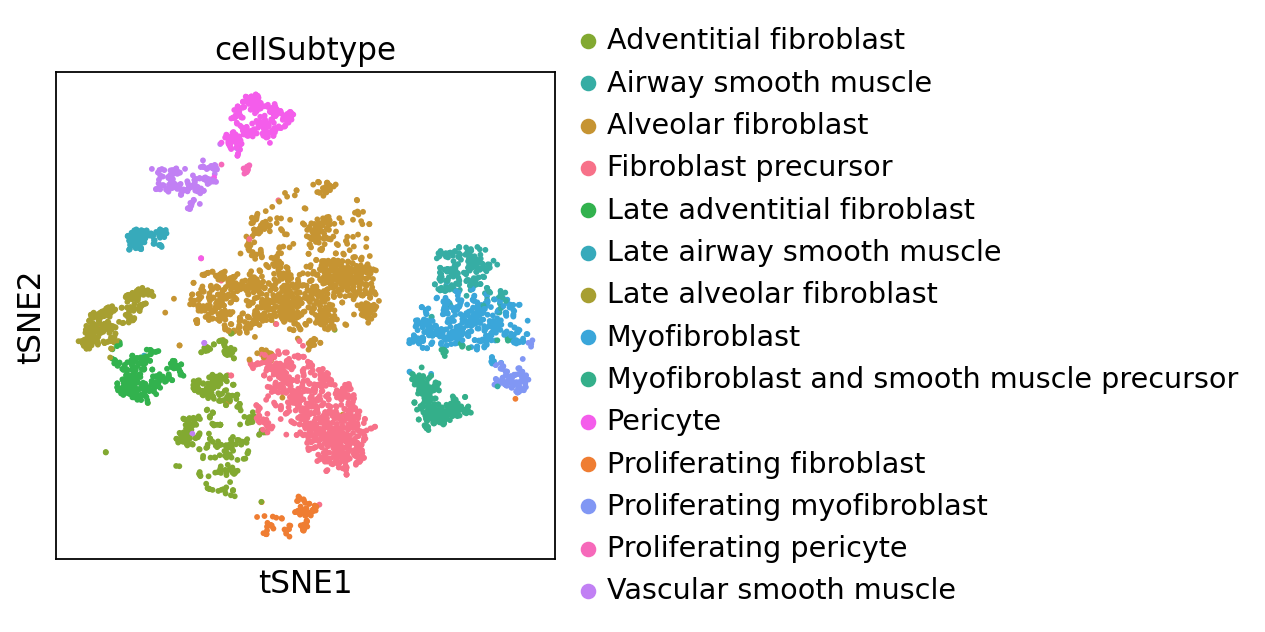

In [4]:
#sc.pl.tsne(adata,color='cellSubtype',palette=[(0.5105309046900421,0.6614299289084904,0.1930849118538962),
                                              (0.21044753832183283, 0.6773105080456748,0.6433941168468681), 
                                              (0.7757319041862729,0.5784925270759935,0.19475566538551875), 
                                              (0.9677975592919913,0.44127456009157356,0.5358103155058701),
                                              (0.19468252393000074,0.6998280342882891,0.3041476695746048),
                                              (0.21662978923073606,0.6676586160122123,0.7318695594345369),
                                              (0.6566480096570136,0.6229564921397143,0.1938976562578914),
                                              (0.2266813382629933, 0.6508721810235698, 0.85618939194681),
                                              (0.20433460114757862,0.6863857739476534,0.5407103379425205),
                                              (0.9587050080494409, 0.3662259565791742, 0.9231469575614251), 
                                              (0.9386807511529497,0.48901639250529133,0.19623149776413562),
                                              (0.5049017849530067,0.5909119231215284,0.9584657252128558),
                                              (0.9640248692994725,0.41206779951067346,0.7303540600728443),
                                              (0.7563369715809057,0.5008642633638004,0.9580503362615219)],
           save='figures/report/cellSubtype.png')

[<AxesSubplot:title={'center':'Stra6'}, xlabel='tSNE1', ylabel='tSNE2'>, <AxesSubplot:label='<colorbar>'>, <AxesSubplot:title={'center':'Rbp1'}, xlabel='tSNE1', ylabel='tSNE2'>, <AxesSubplot:label='<colorbar>'>, <AxesSubplot:title={'center':'Rdh10'}, xlabel='tSNE1', ylabel='tSNE2'>, <AxesSubplot:label='<colorbar>'>, <AxesSubplot:title={'center':'Adh1'}, xlabel='tSNE1', ylabel='tSNE2'>, <AxesSubplot:label='<colorbar>'>, <AxesSubplot:title={'center':'Aldh1a2'}, xlabel='tSNE1', ylabel='tSNE2'>, <AxesSubplot:label='<colorbar>'>]


Text(0, 0.5, 'log2 of cpm')

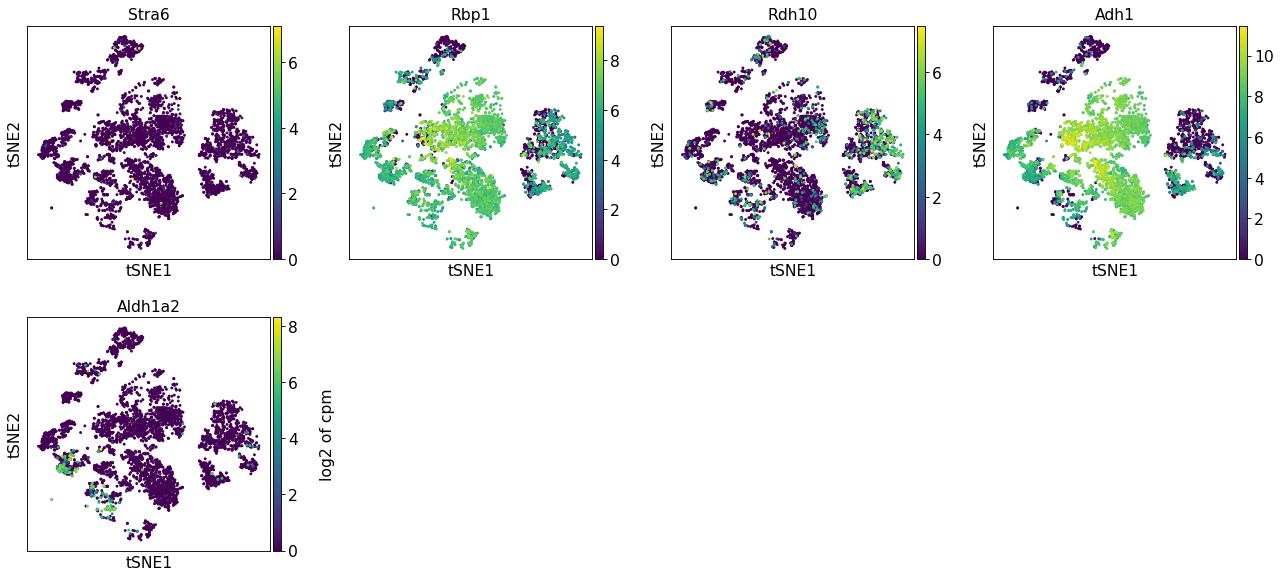

In [5]:
axs=sc.pl.tsne(adata, color=['Stra6','Rbp1','Rdh10','Adh1','Aldh1a2'],show=False)
fig=plt.gcf()
ax_all=fig.get_axes()
print(ax_all)
ax=ax_all[-1]
ax.set_ylabel('log2 of cpm',labelpad=20)

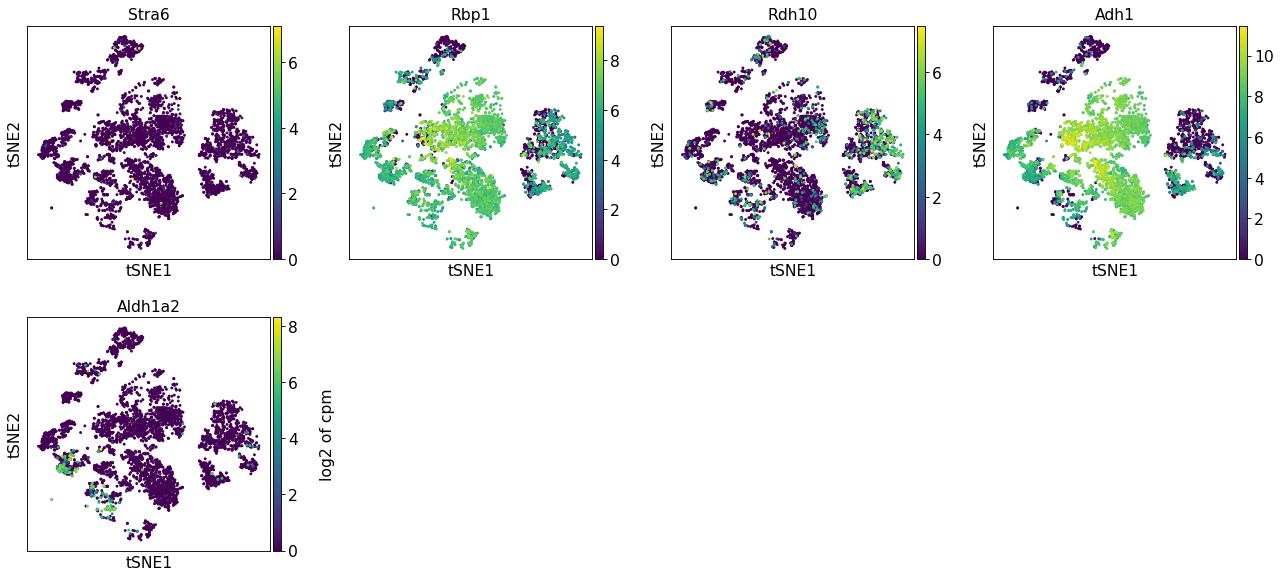

In [6]:
fig

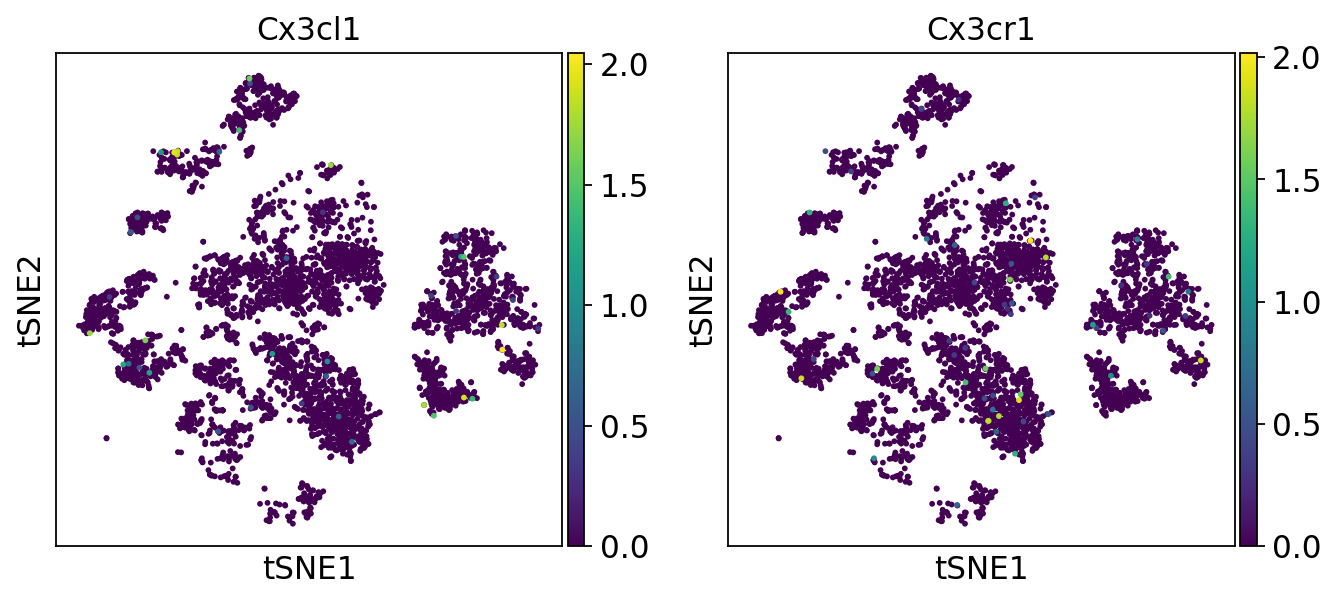

In [7]:
sc.pl.tsne(adata,color=['Cx3cl1', 'Cx3cr1'])

/usr/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'DC' as categorical
... storing 'Gender' as categorical
... storing 'Mousename' as categorical
... storing 'SortType' as categorical
... storing 'Time [days]' as categorical
... storing 'Timepoint' as categorical
... storing 'TimepointHO' as categorical
... storing 'Treatment' as categorical
... storing 'Well' as categorical
... storing 'cellRoughSubtype' as categorical
... storing 'cellSubtype' as categorical
... storing 'cellSubtypeOld' as categorical
... storing 'cellType' as categorical
... storing 'Chromosome' as categorical
... storing 'missing_info' as categorical


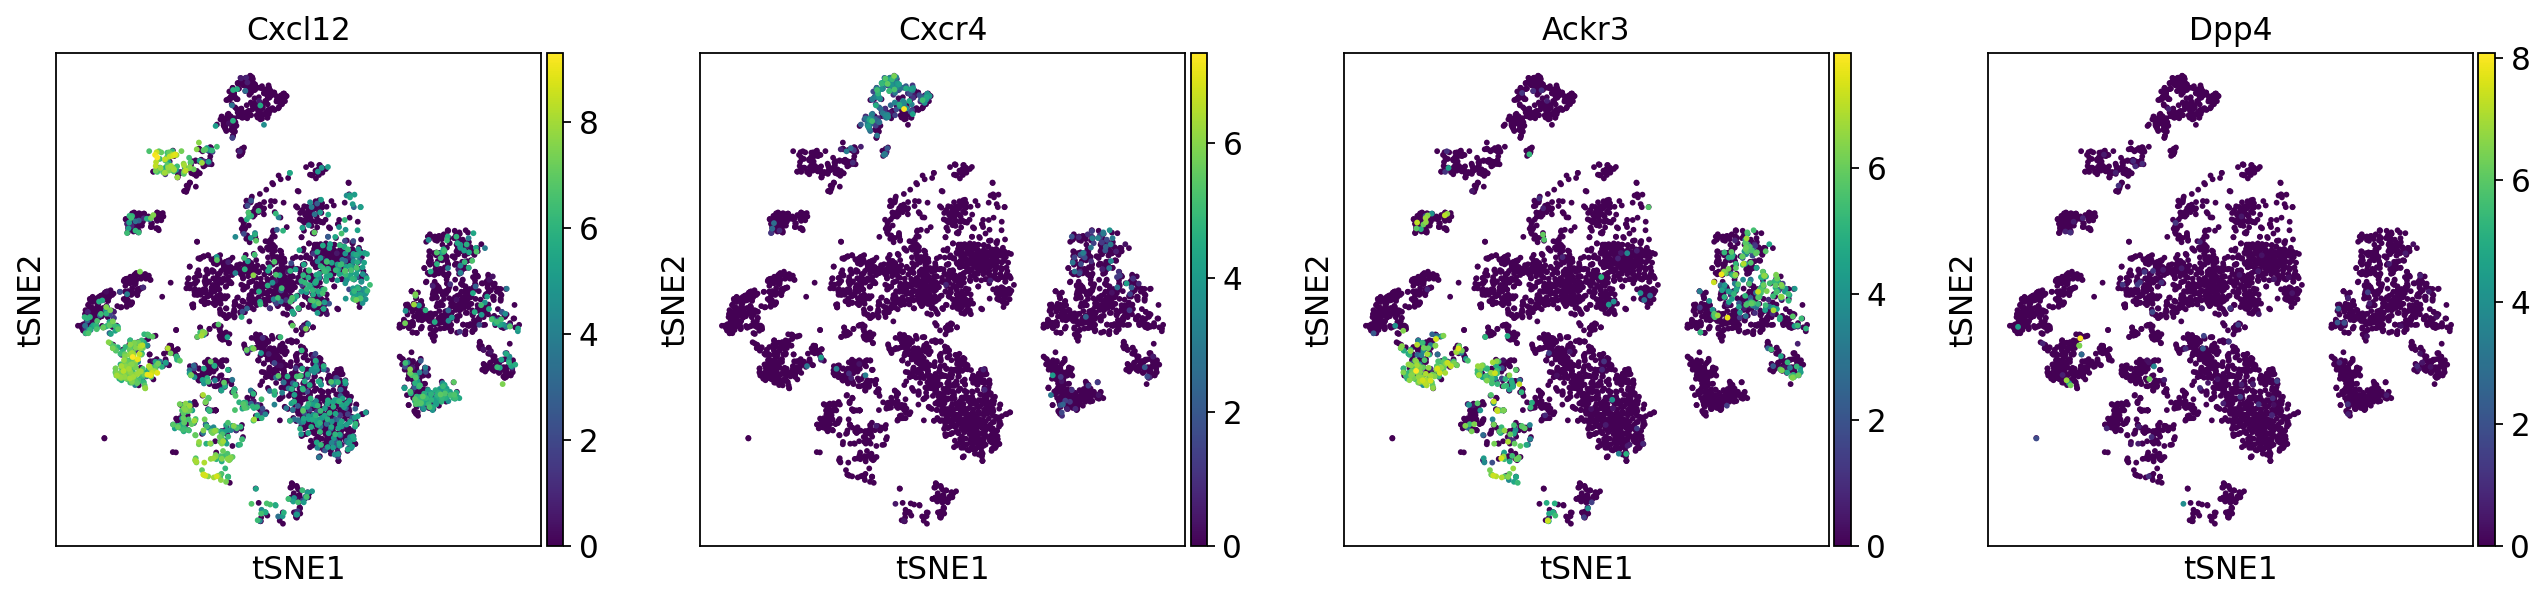

In [5]:
#sc.pl.tsne(adata,color=['Cxcl12','Cxcr4','Ackr3','Dpp4'],ncols=4)

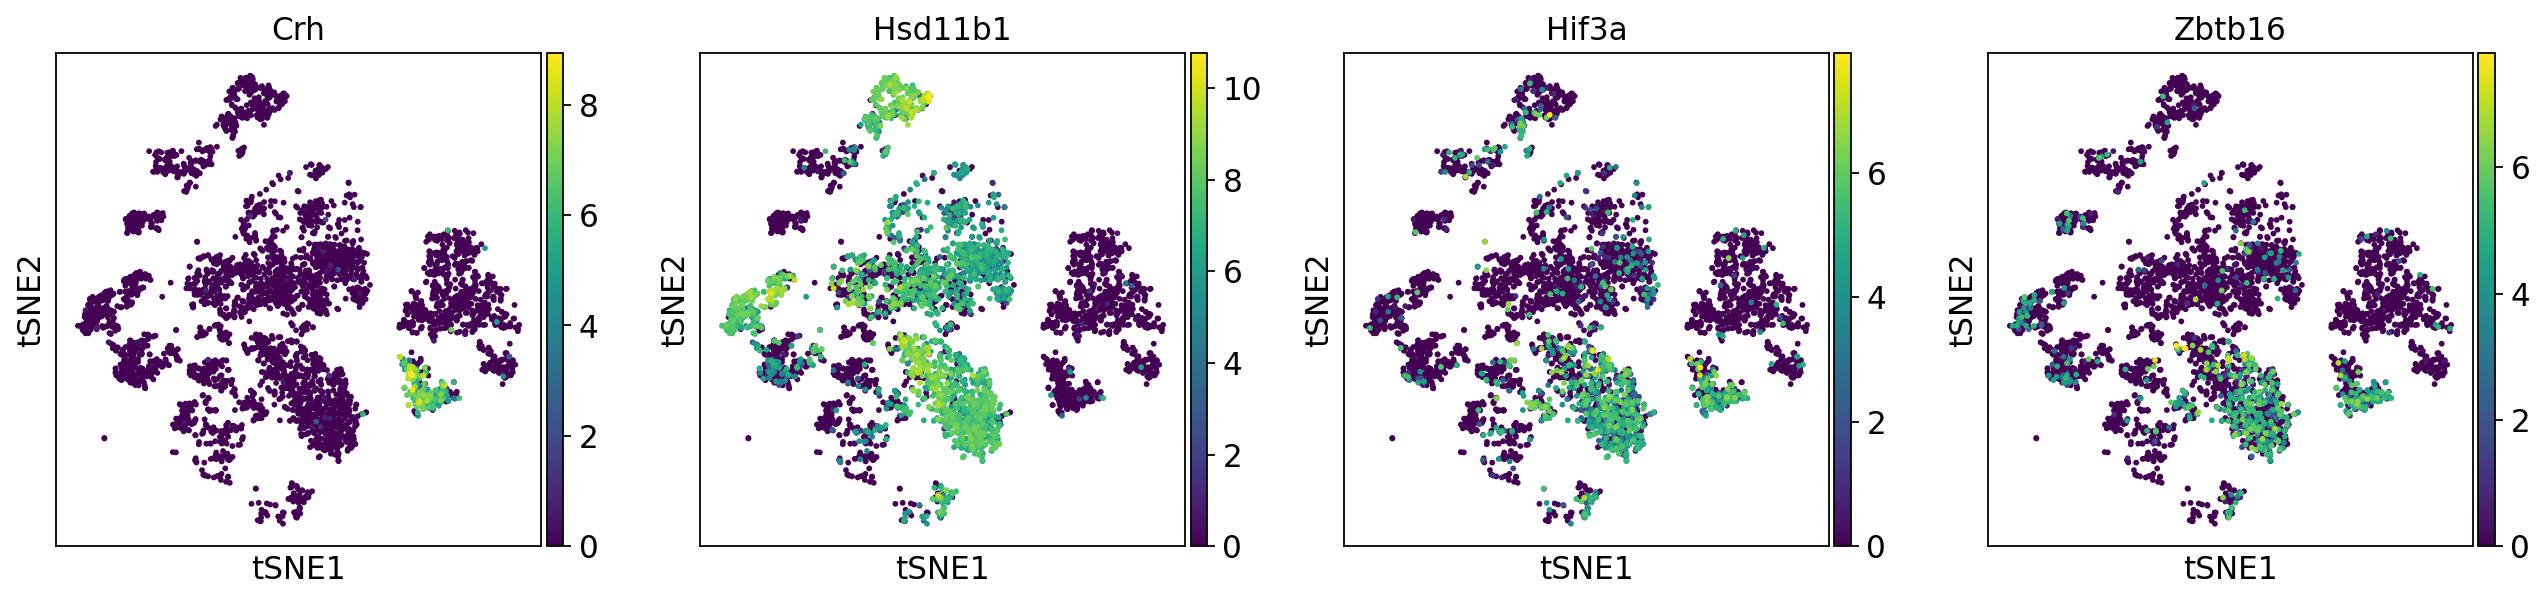

In [139]:
#sc.pl.tsne(adata, color=['Crh','Hsd11b1','Hif3a','Zbtb16'],save='Crh related gene expression.png')

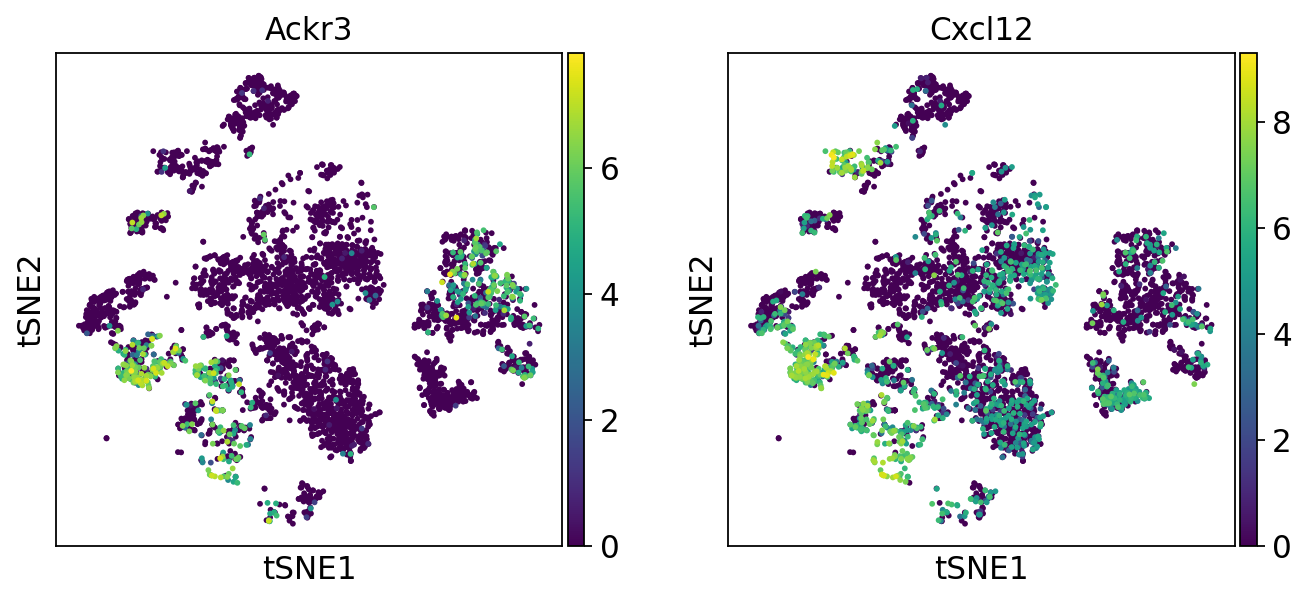

In [10]:
#sc.pl.tsne(adata, color=['Ackr3','Cxcl12'])

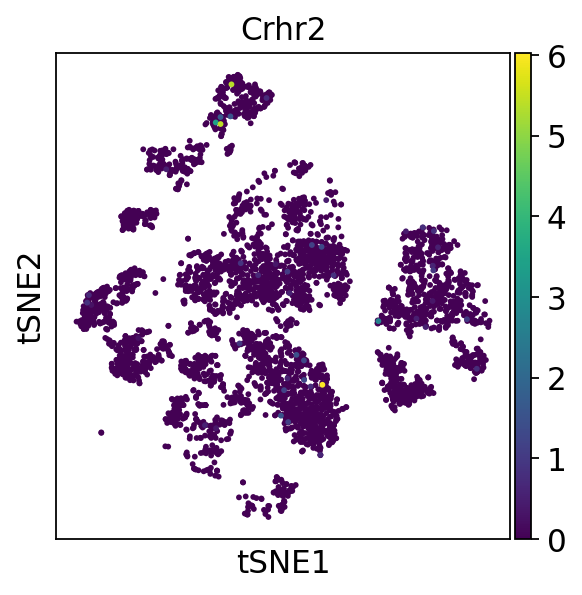

In [142]:
#sc.pl.tsne(adata, color='Crhr2')

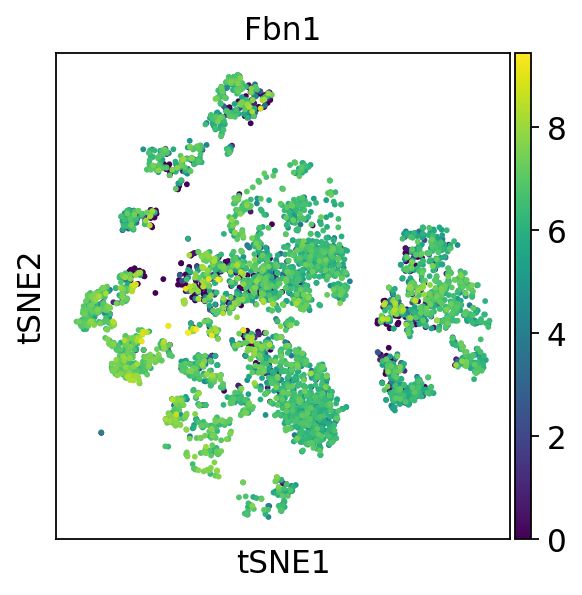

In [10]:
#sc.pl.tsne(adata, color='Fbn1')

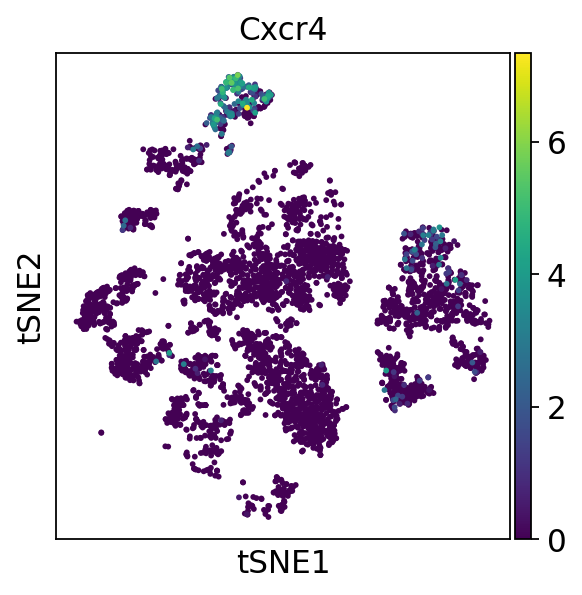

In [7]:
#sc.pl.tsne(adata, color='Cxcr4')

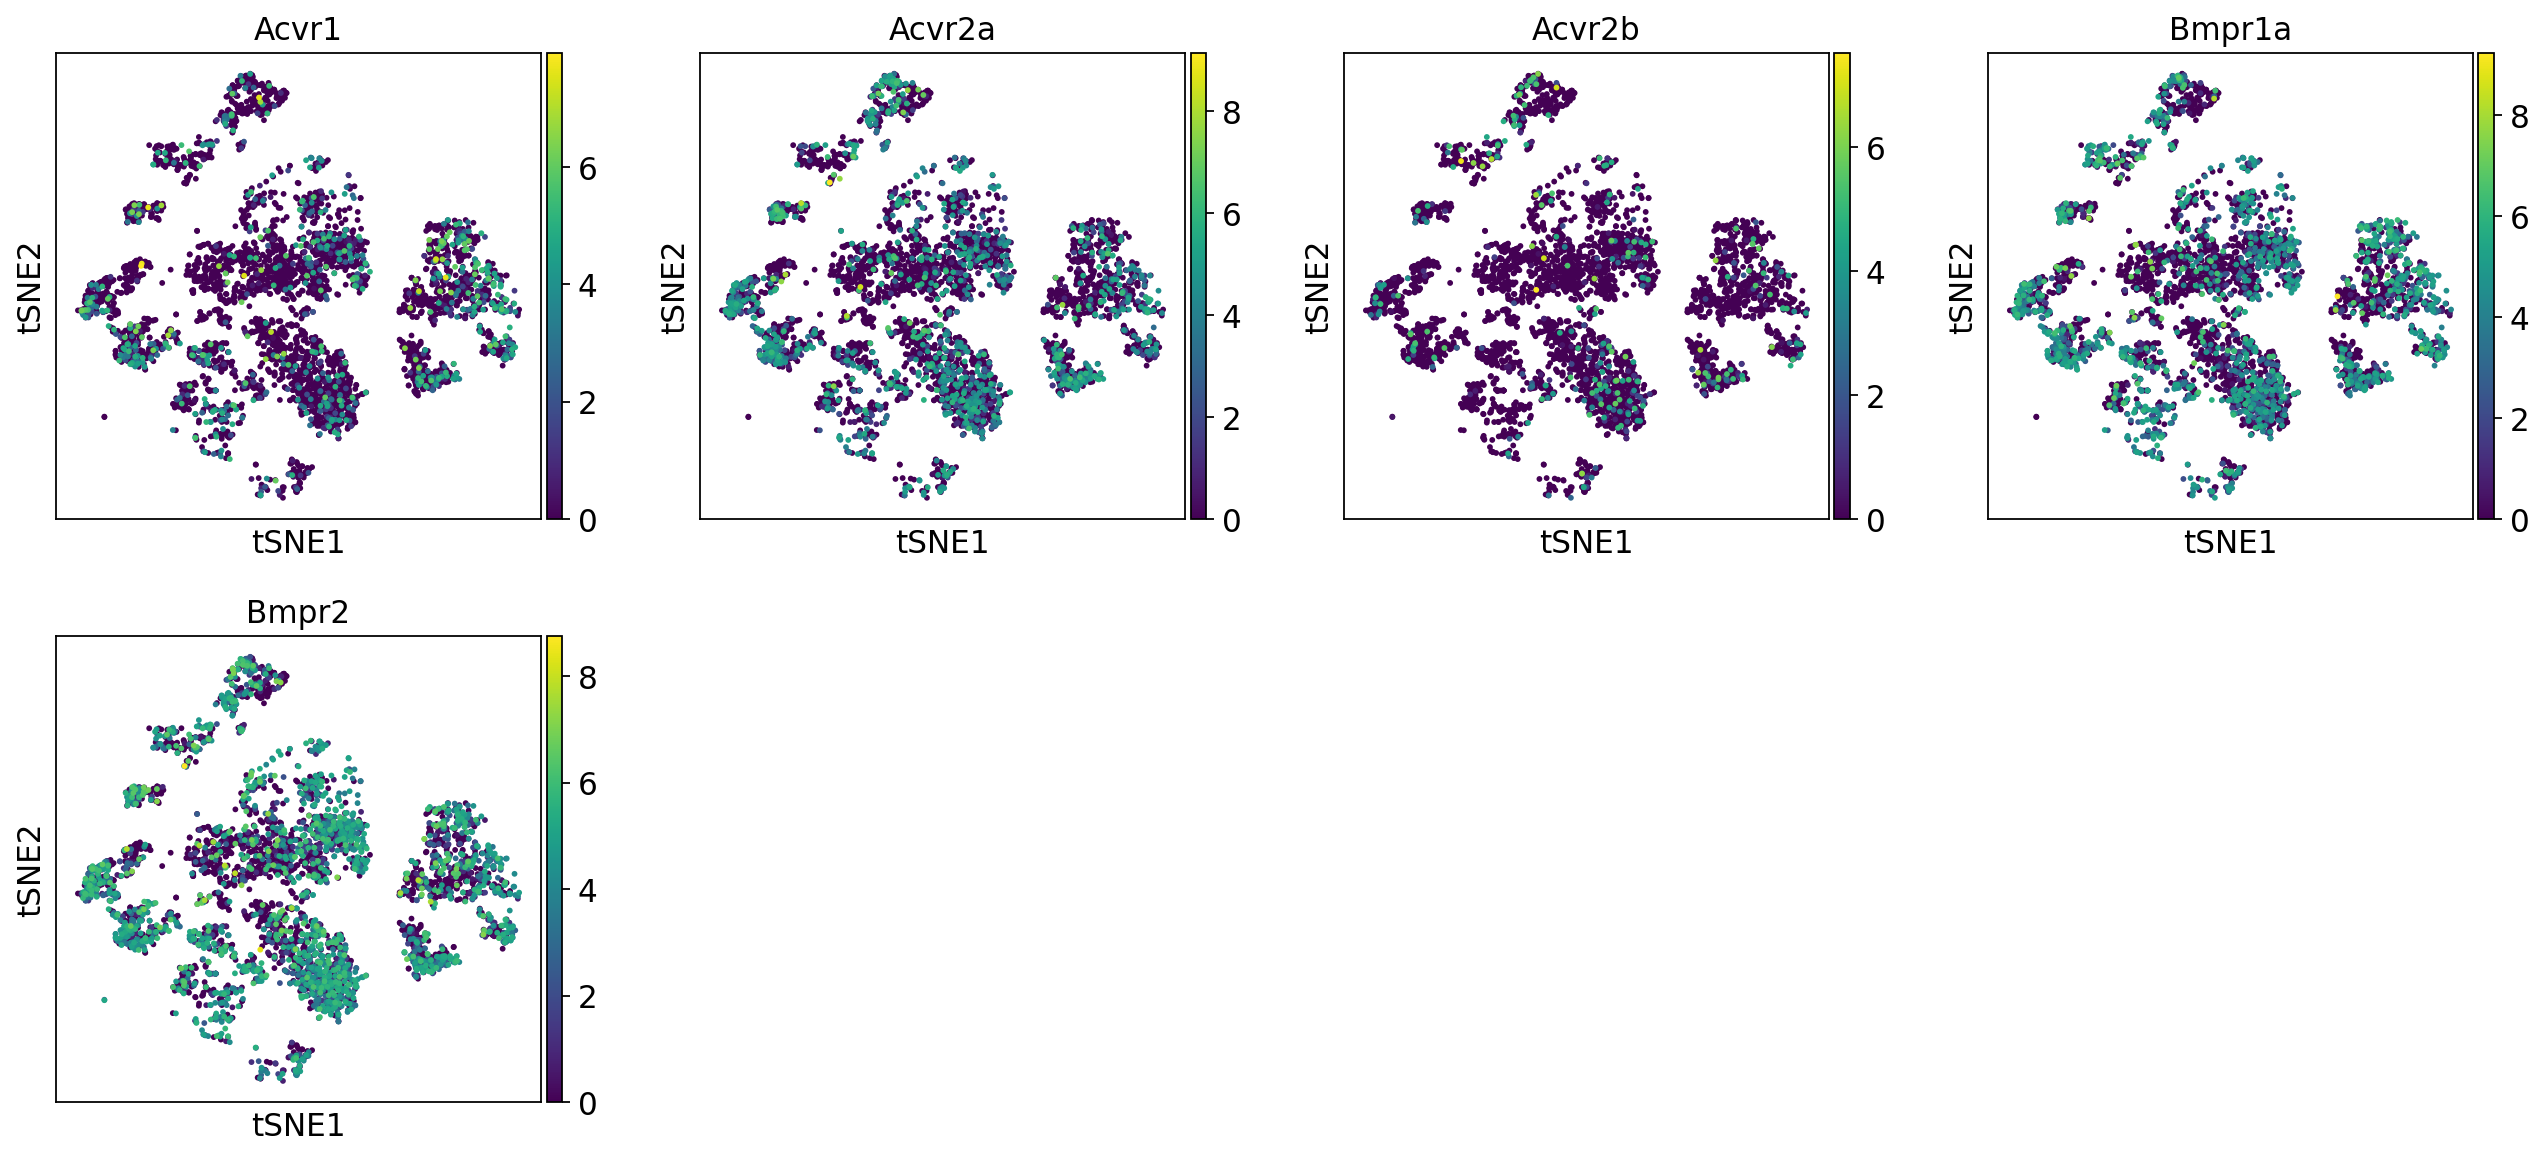

In [8]:
#sc.pl.tsne(adata, color=['Acvr1','Acvr2a','Acvr2b','Bmpr1a','Bmpr2'])

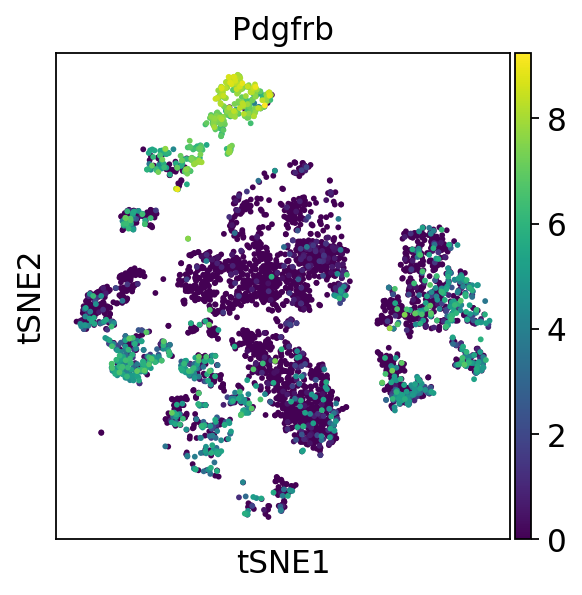

In [9]:
#sc.pl.tsne(adata, color='Pdgfrb')

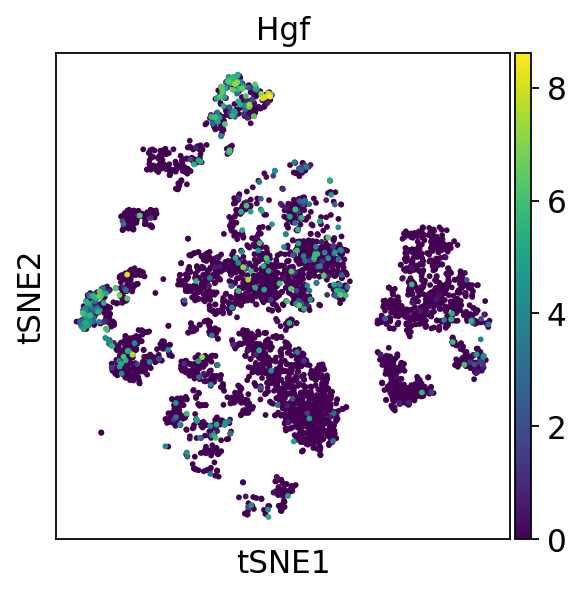

In [10]:
#sc.pl.tsne(adata, color='Hgf')